In [1]:
# import libraries

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# dimension reduction
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # is XGBClassifier is sklearn's wrapper, which is not same as xgb.XGBClassifier
from sklearn.feature_selection import RFECV

# validation
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\tao_k\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# basic stats
print(train.info())
print('*-'*20)
print(test.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Observations:
### Missing values: Age, Cabin and Embarked. 
### Continuous variables: Age and Fare

# Collect some basic information

In [4]:
# for numeric variables
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


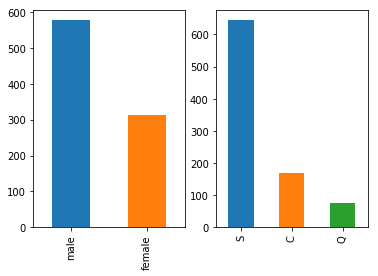

In [5]:
# for object variables: Name, Sex, Ticket and Embarked.
# Let's check Sex and Embarked
# fig,axes=plt.subplots(2,1)
plt.subplot(1,2,1)
train['Sex'].value_counts().plot('bar')
plt.subplot(1,2,2)
train['Embarked'].value_counts().plot('bar')


#### Sex and Embarked both have enough samples for each level. So both variables can be converted into dummy variables or integers for modeling

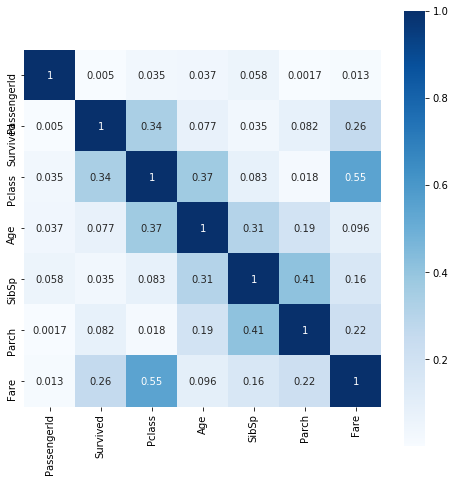

In [6]:
# check correlation between variables
corr = train.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(corr,square=True,cmap='Blues',annot=True)

### There is no significant correlation between numeric variables

# Exploratory Data Analysis

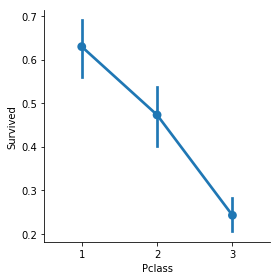

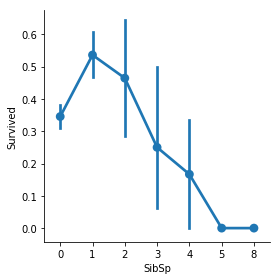

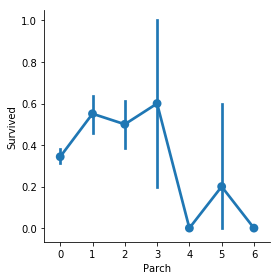

In [7]:
for x in ['Pclass','SibSp','Parch']:
    sns.factorplot(data=train,x=x,y='Survived',kind='point')

## Integer variables

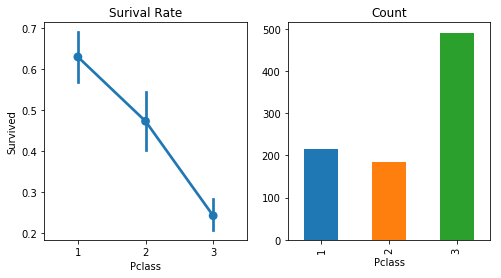

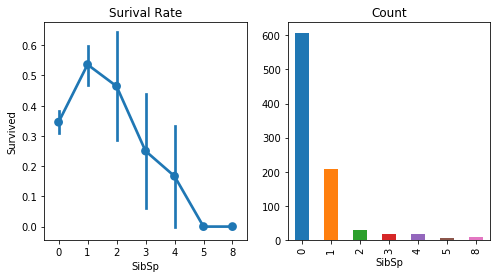

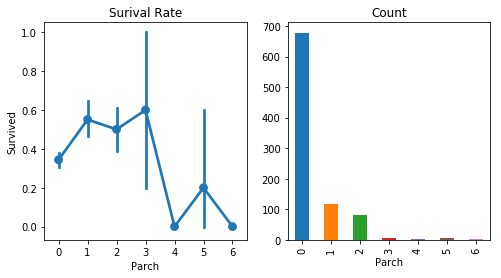

In [8]:
# For integer variables: plot survival rate over integer levels and 
def eda_by_level(v,df):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.pointplot(x=v,y='Survived',data=df)
    plt.title("Surival Rate")
    plt.subplot(1,2,2)
    df[v].value_counts().sort_index().plot.bar()
    plt.xlabel(v)
    plt.title("Count")
    
    
eda_by_level('Pclass',train)
eda_by_level('SibSp',train)
eda_by_level('Parch',train)

(0     608
 1+    283
 Name: SibSp_bin, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x14a5228ab70>)

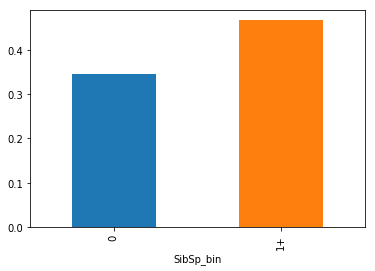

In [9]:
# SibSp 0,1
# Parch 0 and 1+. Because the counts in above groups are small
def create_sibsp_bin(row):
    if row['SibSp'] >= 1:
        return "1+"
    else: return "0"
train['SibSp_bin'] = train.apply(create_sibsp_bin,axis=1)
test['SibSp_bin'] = test.apply(create_sibsp_bin,axis=1)
train['SibSp_bin'].value_counts(), train.groupby('SibSp_bin')['Survived'].mean().plot.bar()

(0    678
 1    118
 2     95
 Name: Parch_bin, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x14a5210ec88>)

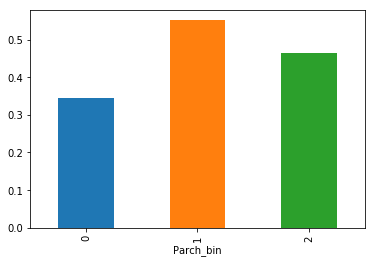

In [10]:
def create_parch_bin(row):
    if row['Parch'] >= 2:
        return '2'
    else: return str(row['Parch'])
train['Parch_bin'] = train.apply(create_parch_bin,axis=1)
test['Parch_bin'] = test.apply(create_parch_bin,axis=1)
train['Parch_bin'].value_counts(), train.groupby('Parch_bin')['Survived'].mean().plot.bar()

In [11]:
train.Parch_bin.dtypes

dtype('O')

## Continuous variables

In [12]:
train[train.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_bin,Parch_bin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,0


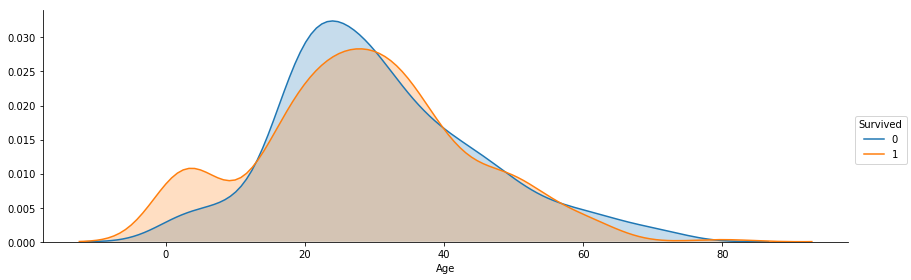

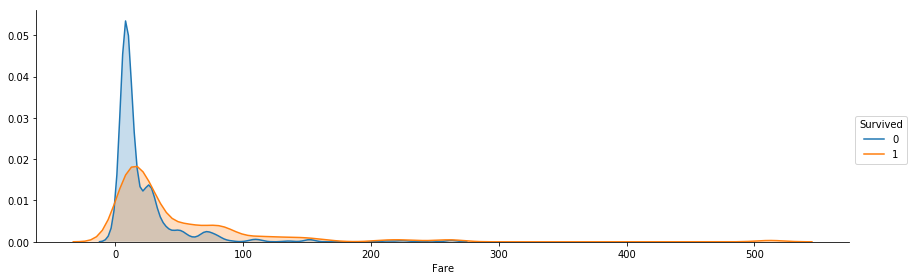

In [13]:
# for continuous variables, let's plot kde over survived and dead population
sns.FacetGrid(data=train,hue='Survived',size=4,aspect=3).map(sns.kdeplot,'Age',shade=True).add_legend()
sns.FacetGrid(data=train,hue='Survived',size=4,aspect=3).map(sns.kdeplot,'Fare',shade=True).add_legend()

# Fare is a right skewed data. If we used it as continuous data, we need to do log transformation. But we may not have enough samples at each age value. So we should create bins.

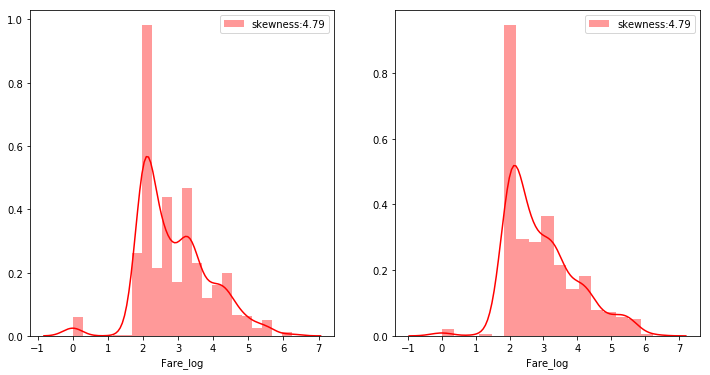

In [14]:
# make log for 'Fare' feature in order to decrease skewness
train['Fare_log'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train['Fare_log'], color='r', label='skewness:%.2f'%train['Fare'].skew()).legend(loc='best')
test['Fare_log'] = test['Fare'].map(lambda i: np.log(i) if i>0 else 0)
plt.subplot(1,2,2)
sns.distplot(test['Fare_log'], color='r', label='skewness:%.2f'%train['Fare'].skew()).legend(loc='best')

In [15]:
fare = train[['Fare','Fare_log','Survived']]
nbins = 4
fare['fare_bins']= pd.qcut(fare.Fare,nbins)
fare['fare_log_bins'] = pd.qcut(fare.Fare_log,nbins)


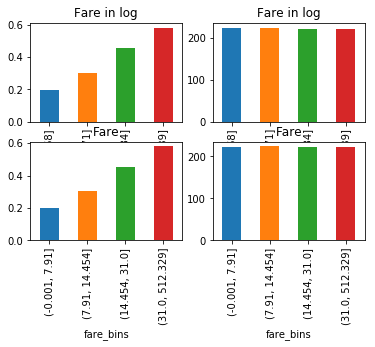

In [16]:
plt.subplot(2,2,1)
fare.groupby('fare_log_bins').Survived.mean().plot.bar()
plt.title('Fare in log')
plt.subplot(2,2,2)
plt.title('Fare in log')
fare.groupby('fare_log_bins').size().plot.bar()

plt.subplot(2,2,3)
plt.title('Fare')
fare.groupby('fare_bins').Survived.mean().plot.bar()
plt.subplot(2,2,4)
plt.title('Fare')
fare.groupby('fare_bins').size().plot.bar()

In [17]:
dfall = pd.concat([train,test])
dfall['Fare_4bins'] = pd.qcut(dfall['Fare'],4,labels=False)
dfall['Fare_5bins'] = pd.qcut(dfall['Fare'],5,labels=False)
dfall['Fare_10bins'] = pd.qcut(dfall['Fare'],10,labels=False)

In [18]:
train = dfall[dfall.Survived.notnull()]
test = dfall[dfall.Survived.isnull()]
train.shape, test.shape

((891, 18), (418, 18))

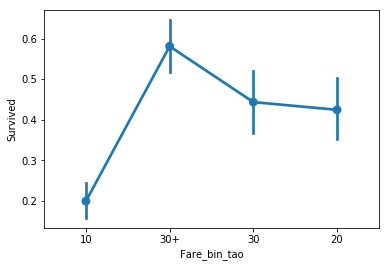

In [19]:
# Another way to bin Fare
def fare_func(row):
    if row['Fare'] <=10:
        return '10'
    elif row['Fare'] <= 20:
        return '20'
    elif row['Fare'] <= 30:
        return '30'
    else:
        return '30+'
    
train['Fare_bin_tao'] = train.apply(fare_func,axis=1)
test['Fare_bin_tao'] = test.apply(fare_func,axis=1)
sns.pointplot(x='Fare_bin_tao',y='Survived',data=train)

In [20]:
train.info()
print('*-'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
Age             714 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Fare            891 non-null float64
Fare_log        891 non-null float64
Name            891 non-null object
Parch           891 non-null int64
Parch_bin       891 non-null object
PassengerId     891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
SibSp           891 non-null int64
SibSp_bin       891 non-null object
Survived        891 non-null float64
Ticket          891 non-null object
Fare_4bins      891 non-null float64
Fare_5bins      891 non-null float64
Fare_10bins     891 non-null float64
Fare_bin_tao    891 non-null object
dtypes: float64(7), int64(4), object(8)
memory usage: 179.2+ KB
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 19 columns)

### Plot age

In [21]:
age = train.loc[train.Age.notnull(),'Age']
age_bin = pd.qcut(age,5)
# age_bin = pd.qcut(train[train.Age.notnull(),'Age'],5)
age_bin.value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [22]:
def plot_survived_agegroups(n):
    age_df = train[['Survived','Age']]
    age_df['age_cut'] = pd.qcut(age_df['Age'],n)
    print(age_df.age_cut.value_counts())
    plt.figure(figsize=(12,6))
    age_df.head()
    plt.subplot(1,2,1)
    sns.pointplot(x='age_cut',y='Survived', data=age_df)
    plt.subplot(1,2,2)
    age_df.groupby('age_cut')['Survived'].size().plot.bar()

(20.125, 28.0]     183
(0.419, 20.125]    179
(38.0, 80.0]       177
(28.0, 38.0]       175
Name: age_cut, dtype: int64
(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: age_cut, dtype: int64
(0.419, 16.0]     100
(20.125, 24.0]     98
(32.312, 38.0]     91
(47.0, 80.0]       89
(38.0, 47.0]       88
(24.0, 28.0]       85
(28.0, 32.312]     84
(16.0, 20.125]     79
Name: age_cut, dtype: int64


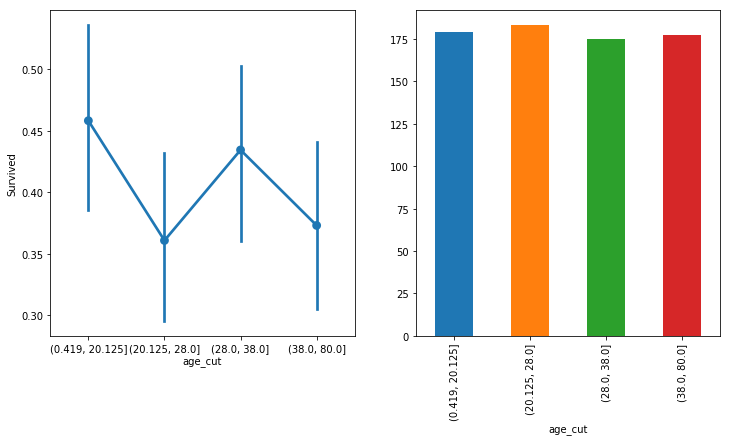

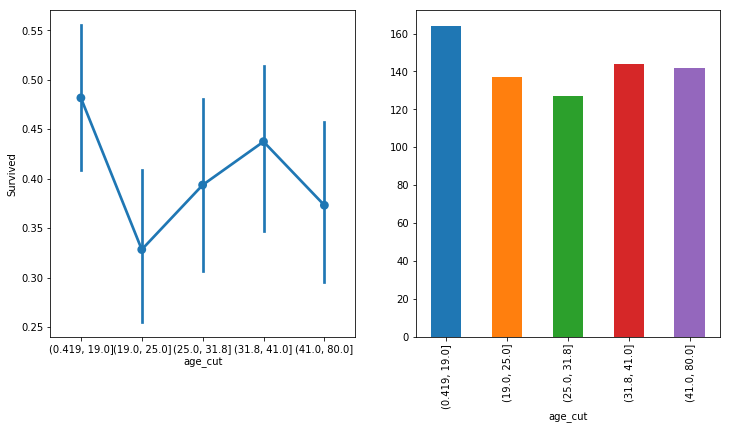

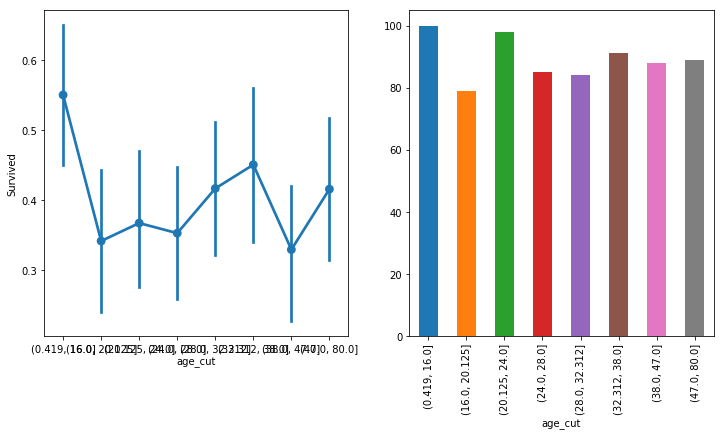

In [23]:
plot_survived_agegroups(4)
plot_survived_agegroups(5)
plot_survived_agegroups(8)

(30, 45]    202
(16, 25]    201
(25, 30]    108
(45, 80]    103
(0, 16]     100
Name: age_cut, dtype: int64


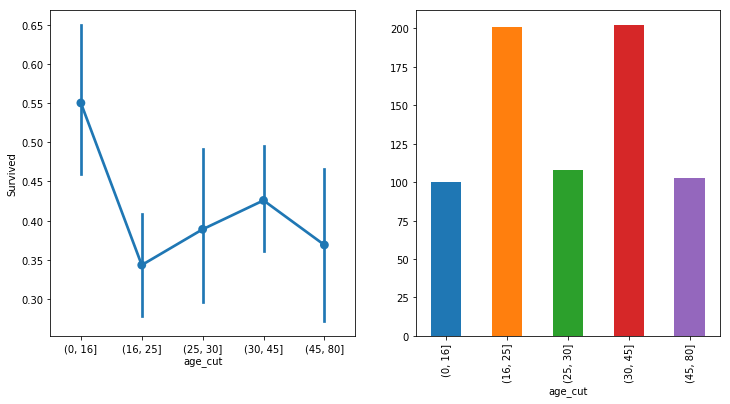

In [24]:
# I tried to find a good bins, not based on qcut, but on survival rate. It looks better than above age_4bins, age_5bins, etc.
bins = [0,16,25,30,45,80]
age_df = train[['Survived','Age']]
age_df['age_cut'] = pd.cut(age_df['Age'],bins)
print(age_df.age_cut.value_counts())
plt.figure(figsize=(12,6))
age_df.head()
plt.subplot(1,2,1)
sns.pointplot(x='age_cut',y='Survived', data=age_df)
plt.subplot(1,2,2)
age_df.groupby('age_cut')['Survived'].size().plot.bar()

### Observations: The young population has a higher chance to survive. The population with higher fare has a higher chance to survive. Both are good candidates

### After imputing ages in the later analysis, we will create binnings

## Object Variables

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object
3       301
2       183
1       146
PC       60
C.A.     27
Name: Ticket, dtype: int64


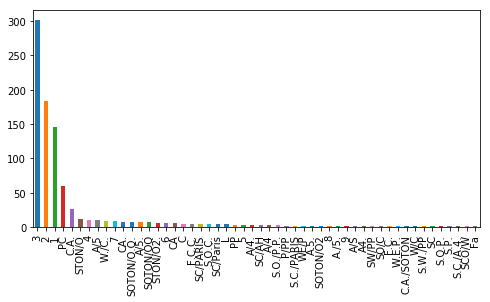

In [25]:
# For object variabels: Name, Sex, Ticket and Embarked and Cabin
# Ticket
print(train['Ticket'].head(10))
prefix = train['Ticket'].apply(lambda x:  x.split(' ')[0] if ' ' in x  else str(x)[0])
plt.figure(figsize=(8,4))
print(prefix.value_counts().head())
prefix.value_counts().plot.bar()


In [26]:
def get_prefix_grp(row):
    if ' ' in row['Ticket']:
        x = row['Ticket'].split(' ')[0]
        if x in ['PC']:
            return x
        else: return 'Other'
    else:
        x = str(row['Ticket'])[0]
        if x in ['1','2','3']:
            return x
        else: return 'Other'

prefix_grp = train.apply(get_prefix_grp, axis= 1)
prefix_grp.value_counts()

3        301
Other    201
2        183
1        146
PC        60
dtype: int64

1        0.630137
2        0.464481
3        0.239203
Other    0.268657
PC       0.650000
Name: Survived, dtype: float64


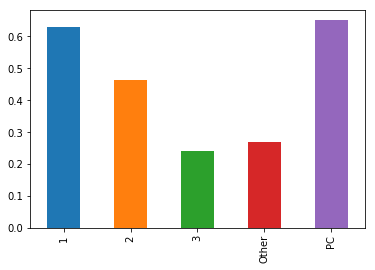

In [27]:
train.groupby(prefix_grp)['Survived'].mean().plot.bar()
print(train.groupby(prefix_grp)['Survived'].mean())

In [28]:
# Let's creat this prefix groups in train and test
for df in [train,test]:
    df['Ticket_prefix_grp'] = df.apply(get_prefix_grp, axis= 1)
    
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
Age                  714 non-null float64
Cabin                204 non-null object
Embarked             889 non-null object
Fare                 891 non-null float64
Fare_log             891 non-null float64
Name                 891 non-null object
Parch                891 non-null int64
Parch_bin            891 non-null object
PassengerId          891 non-null int64
Pclass               891 non-null int64
Sex                  891 non-null object
SibSp                891 non-null int64
SibSp_bin            891 non-null object
Survived             891 non-null float64
Ticket               891 non-null object
Fare_4bins           891 non-null float64
Fare_5bins           891 non-null float64
Fare_10bins          891 non-null float64
Fare_bin_tao         891 non-null object
Ticket_prefix_grp    891 non-null object
dtypes: float64(7), int64(4), object(9)
memory usage: 186.2+ KB
<class '

(None, None)

### Let's see family or friends that hold the same tickets


In [29]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [30]:
# There are a some cases family or friends were holding the same ticket. Let's find out those groups and see what we can use
tickets = pd.concat(grp[['PassengerId','Survived','Ticket','SibSp','Parch','Cabin']] for name,grp in train.groupby(['Ticket']) if len(grp)>1) 
print(tickets.shape)
tickets.head(20)

(344, 6)


,PassengerId,Survived,Ticket,SibSp,Parch,Cabin
257,258,1.0,110152,0,0,B77
504,505,1.0,110152,0,0,B79
759,760,1.0,110152,0,0,B77
262,263,0.0,110413,1,1,E67
558,559,1.0,110413,1,1,E67
585,586,1.0,110413,0,2,E68
110,111,0.0,110465,0,0,C110
475,476,0.0,110465,0,0,A14
329,330,1.0,111361,0,1,B18
523,524,1.0,111361,0,1,B18


In [31]:
grp = tickets.groupby('Ticket')
print(grp.Survived.mean().head())
# sns.pointplot(x='Ticket',y='Survived', data=tickets)

ticket_survival = tickets.groupby('Ticket')['Survived'].mean()
ticket_survival.value_counts()

Ticket
110152    1.000000
110413    0.666667
110465    0.000000
111361    1.000000
113505    1.000000
Name: Survived, dtype: float64


1.000000    48
0.000000    37
0.500000    32
0.666667    11
0.750000     3
0.714286     1
0.333333     1
0.250000     1
Name: Survived, dtype: int64

In [32]:
s1 = train['Ticket']
s2 = test['Ticket']
m = set(s1) & set(s2)   # overlapped Tickets
print(len(m))
print(m)

115
{'36928', 'SC/PARIS 2167', '36568', '113059', 'F.C. 12750', 'PC 17755', 'PC 17759', '4133', '17463', '29105', '19950', '237789', '349910', '382652', '236853', 'SC/Paris 2123', '315153', '113509', '2680', '3101295', '113503', '33638', 'W./C. 6608', '349909', 'C.A. 33595', 'A/5. 3337', 'W./C. 6607', '11769', '386525', '112058', 'PC 17761', 'PC 17760', 'PC 17599', '230136', '392091', '364498', '2661', '29103', '29750', '244358', '17464', 'CA 2144', '11753', '345572', 'S.C./PARIS 2079', '2625', '345763', 'PC 17569', '370129', 'F.C.C. 13528', '228414', 'PC 17756', 'SC/AH 3085', 'PC 17603', '3101298', 'C.A. 34651', 'C.A. 2673', 'C.A. 6212', '19928', 'PC 17757', 'PC 17758', '370371', '250651', 'W.E.P. 5734', 'PC 17483', '2662', '371362', '113773', '16966', '113796', '26360', 'PC 17558', 'PC 17585', '367226', '11767', '347080', 'PP 9549', '24160', 'C.A. 2315', '113781', '11765', '26707', '376566', '19877', 'S.O.C. 14879', 'C 4001', 'A/4 48871', '2653', '350026', '110813', 'PC 17592', '2822

In [33]:
# Since the friends/family holding same tickets data came across both Train and Test datasets. 
# For each Ticket group, calculate the survival rate excluding him/herself. 
train_copy = train.copy()
test_copy = test.copy()
dfall = pd.concat([train,test])
dfall.shape

(1309, 20)

In [34]:
a = pd.DataFrame({'A':[1,2,3,4],'B':[10,20,30,40]})
a.drop(0)


,A,B
1,2,20
2,3,30
3,4,40


In [35]:
dfall['connected_survived'] = 0.5
for _,grp in dfall.groupby('Ticket'):
    if len(grp) > 1:
        for index, rows in grp.iterrows():
            survival_rate = grp.drop(index)['Survived'].mean()  # removed itself and calculate the survival rate
            passID = rows['PassengerId']
            if survival_rate == 1 or survival_rate == 0:
                dfall.loc[dfall.PassengerId == passID,'connected_survived'] = survival_rate


dfall.connected_survived.value_counts()


0.5    888
1.0    219
0.0    202
Name: connected_survived, dtype: int64

In [36]:
train = dfall[dfall.Survived.notnull()]
test = dfall[dfall.Survived.isnull()]
print(train.shape,test.shape)
train.info(),test.info()

(891, 21) (418, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-nu

(None, None)

### Sex and Embarked

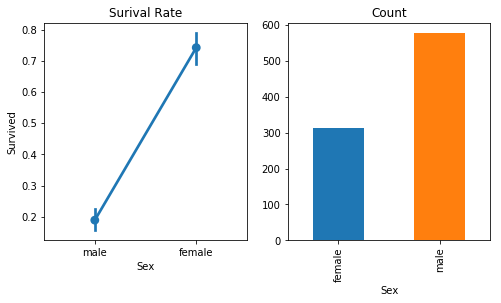

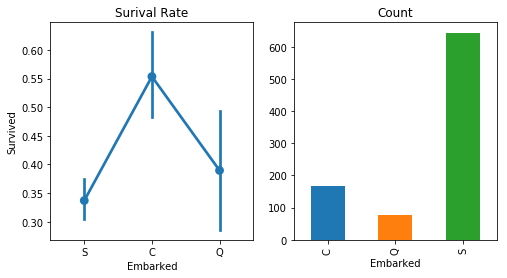

In [37]:
eda_by_level('Sex',train)
eda_by_level('Embarked',train)

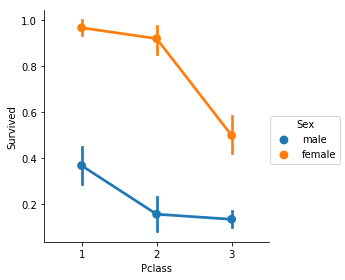

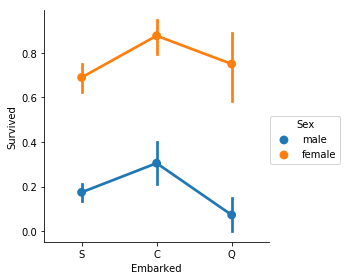

In [38]:
sns.factorplot(x='Pclass',y='Survived', hue ='Sex',data=train)
sns.factorplot(x='Embarked',y='Survived', hue ='Sex',data=train)

In [39]:
# Name
print(train['Name'].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


### Based on discussions on Kaggle, we can create title using Name column.

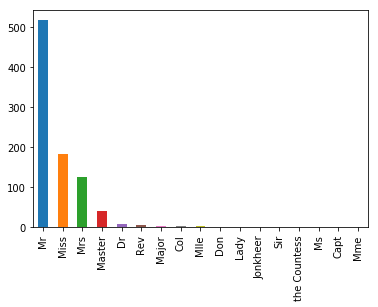

In [40]:
title=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
title.value_counts().plot.bar()

### Mr. Miss, Mrs and Master have decent counts. Maybe we should group other categories. It's suggested to impute the age based on title. Let's check the mean or median age by title groups

In [41]:
title_cat = title.apply(lambda x: x if x in ['Mr','Miss','Mrs','Master'] else 'Other')
print(title_cat.value_counts())
print("*-"*20)
print(train.groupby(title_cat)['Age'].agg(['mean','median']))

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Name, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
             mean  median
Name                     
Master   4.574167     3.5
Miss    21.773973    21.0
Mr      32.368090    30.0
Mrs     35.898148    35.0
Other   42.384615    44.5


### Master looks werid to me. The median age is only 3.5. Let's check the missing value by title groups. See if the missing value biased the median 

Text(0.5,1,'Total data counts by title groups')

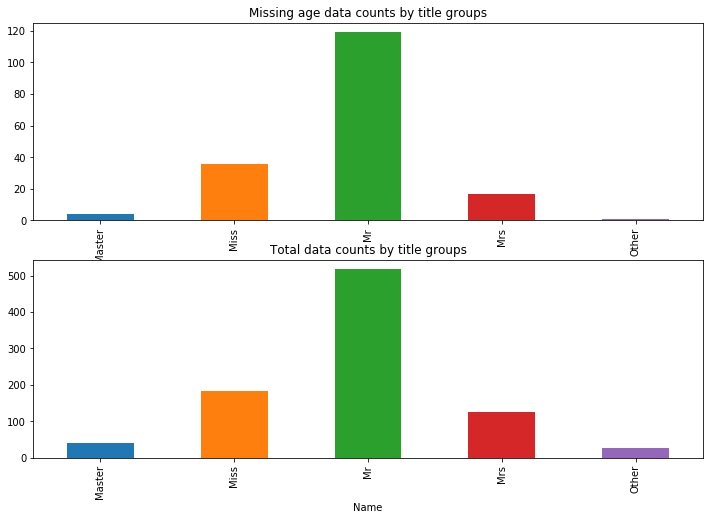

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
train.groupby(title_cat).apply(lambda x: x['Age'].isnull().sum()).plot.bar()
plt.title('Missing age data counts by title groups')
plt.subplot(2,1,2)
train.groupby(title_cat).size().plot.bar()
plt.title("Total data counts by title groups")


### Looks like the missing ages are random event. So it's ok to impute missing age by median value in each title group. But we shouldn't use Master because it's median age is too small.

In [43]:
# Create title_cat in train and test datasets

for df in [train,test]:
    df['title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    df['title_cat'] = df['title'].apply(lambda x: x if x in ['Mr','Miss','Mrs'] else 'Other')

train.info(),test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 23 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

## Object Variables - Cabin  
## Cabin has a lot of missing values. But before throwing it away, let's check the data first

In [44]:
mask = train['Cabin'].isnull()
train.loc[mask == False,['Cabin']].head(20)

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
21,D56
23,A6
27,C23 C25 C27
31,B78
52,D33


0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
dtype: int64


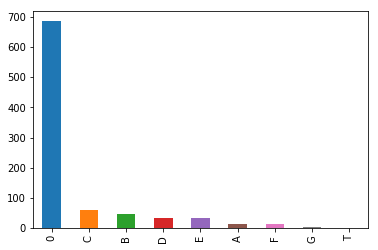

In [45]:
# let's take the first letter out
cabin_letter = train.apply(lambda x: '0' if pd.isnull(x['Cabin']) else str(x['Cabin'])[0], axis=1)
print(cabin_letter.value_counts())
cabin_letter.value_counts().plot('bar')

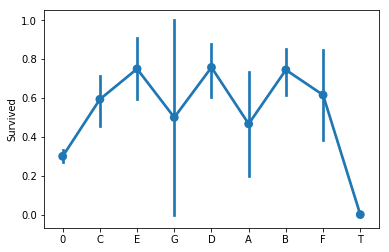

In [46]:
sns.pointplot(x=cabin_letter, y='Survived',data=train)

0.7710437710437711


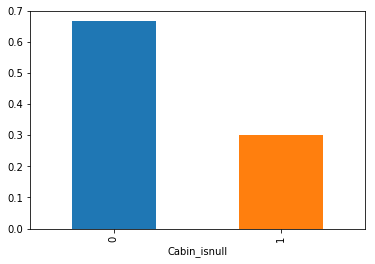

In [47]:
# 77% of train dataset has NaN in Cabin
print(train['Cabin'].isnull().mean())

# Check the survival rate
train['Cabin_isnull'] = train['Cabin'].isnull()*1
test['Cabin_isnull'] = test['Cabin'].isnull()*1
train.groupby('Cabin_isnull')['Survived'].mean().plot.bar()

In [48]:
# for df in [train,test]:
#     df['Cabin_fillna'] = df.Cabin.fillna(0)
#     df.loc[df.Cabin.str[0] == 'A', 'Cabin_fillna'] = 1
#     df.loc[df.Cabin.str[0] == 'B', 'Cabin_fillna'] = 2
#     df.loc[df.Cabin.str[0] == 'C', 'Cabin_fillna'] = 3
#     df.loc[df.Cabin.str[0] == 'D', 'Cabin_fillna'] = 4
#     df.loc[df.Cabin.str[0] == 'E', 'Cabin_fillna'] = 5
#     df.loc[df.Cabin.str[0] == 'F', 'Cabin_fillna'] = 6
#     df.loc[df.Cabin.str[0] == 'G', 'Cabin_fillna'] = 7
#     df.loc[df.Cabin.str[0] == 'T', 'Cabin_fillna'] = 8

train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 24 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

# Impute missing age

### Impute missing ages using median value across title_cat

In [49]:
def get_age_dict(df):
    median_age = df.groupby('title_cat')['Age'].median()
    print(median_age)
    age_dict = median_age.to_dict()
    print(age_dict)
    return age_dict

age_dict_train = get_age_dict(train)
print('*-'*20)
age_dict_test = get_age_dict(test)


title_cat
Miss     21.0
Mr       30.0
Mrs      35.0
Other     9.0
Name: Age, dtype: float64
{'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'Other': 9.0}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
title_cat
Miss     22.0
Mr       28.5
Mrs      36.5
Other    10.0
Name: Age, dtype: float64
{'Miss': 22.0, 'Mr': 28.5, 'Mrs': 36.5, 'Other': 10.0}


In [50]:
def impute_age(newvar,df,age_dict):
    df[newvar] = df.apply(lambda x: age_dict[x['title_cat']] if pd.isnull(x['Age']) else x['Age'], axis=1)

impute_age('Age_fillna',train, age_dict_train)
impute_age('Age_fillna',test, age_dict_test)

In [51]:
# check imputation result
train.isnull().sum(axis=0)   # axis=0 meaning across all rows

Age                   177
Cabin                 687
Embarked                2
Fare                    0
Fare_log                0
Name                    0
Parch                   0
Parch_bin               0
PassengerId             0
Pclass                  0
Sex                     0
SibSp                   0
SibSp_bin               0
Survived                0
Ticket                  0
Fare_4bins              0
Fare_5bins              0
Fare_10bins             0
Fare_bin_tao            0
Ticket_prefix_grp       0
connected_survived      0
title                   0
title_cat               0
Cabin_isnull            0
Age_fillna              0
dtype: int64

In [52]:
test.isnull().sum(axis=0)

Age                    86
Cabin                 327
Embarked                0
Fare                    1
Fare_log                0
Name                    0
Parch                   0
Parch_bin               0
PassengerId             0
Pclass                  0
Sex                     0
SibSp                   0
SibSp_bin               0
Survived              418
Ticket                  0
Fare_4bins              1
Fare_5bins              1
Fare_10bins             1
Fare_bin_tao            0
Ticket_prefix_grp       0
connected_survived      0
title                   0
title_cat               0
Cabin_isnull            0
Age_fillna              0
dtype: int64

In [53]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 25 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

### qcut is tricy. If you have many repeated values, the results may not give you the same counts across bins. See the example below. 

803    0.42
755    0.67
469    0.75
644    0.75
831    0.83
Name: Age_fillna, dtype: float64


Text(0.5,1,'count by 5 qcut bins')

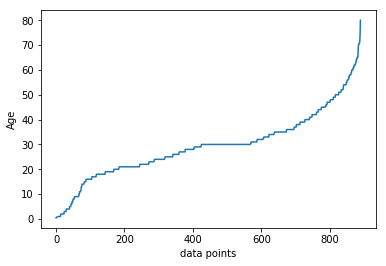

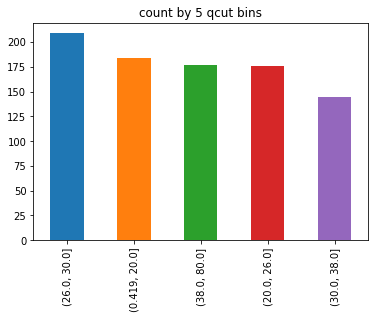

In [54]:
x=train.Age_fillna.sort_values()
print(x.head())
plt.subplots()
plt.plot(x.values)
plt.ylabel("Age")
plt.xlabel("data points")


# split into 5 bins.
x2 = pd.qcut(x,5)
s = pd.Series(x2)
plt.subplots()
s.value_counts().plot.bar()
plt.title("count by 5 qcut bins")

### The reason why the counts above are not same across 5 bins is because we have repeated values. Check the result below. Below shows all the records that have repeated values in Age_fillna

In [55]:
dup_age = pd.concat(grp[['Age_fillna']] for name,grp in train.groupby(['Age_fillna']) if len(grp)>1)

dup_age.head()

,Age_fillna
469,0.75
644,0.75
78,0.83
831,0.83
164,1.00


### Let's work on age binning

In [56]:
def age_group(row):
    if np.isnan(row['Age']):  # row['Age'] is a float type number, can't use .isnull()
        return 'nan'
    elif row['Age'] <= 10:
        return '10'
    elif row['Age']<=20:
        return '20'
    elif row['Age']<=25:
        return '25'
    elif row['Age']<=30:
        return '30'
    elif row['Age']<=40:
        return '40'
    elif row['Age']<=50:
        return '50'
    else:
        return '50+'

In [57]:
# I created different ways of binning. My favoriate is age_le16 and age_bin. Because their survival rate is clearly separable
# between groups

bins = [0,16,25,30,45,80]
for df in [train,test]:
    df['age_4bins'] = pd.cut(df['Age_fillna'], [0,20,28,38,80], labels=False)
    df['age_5bins'] = pd.cut(df['Age_fillna'],[0,19,25,31,41,80], labels=False)
    df['age_6bins'] = pd.cut(df['Age_fillna'],[0,18,23,28,34,44,80], labels=False)
    df['age_bin'] = pd.cut(df['Age_fillna'],bins)
    df['age_le16'] = df.apply(lambda x:  1 if x['Age_fillna'] <= 16 else 0, axis=1)
    df['age_bin_tao'] = df.apply(age_group,axis=1)
    
print(train['age_bin_tao'].value_counts())
train.age_4bins.value_counts(),train.age_5bins.value_counts(),train.age_6bins.value_counts(), train.age_bin.value_counts()

nan    177
40     155
25     122
20     115
30     108
50      86
10      64
50+     64
Name: age_bin_tao, dtype: int64


(2    311
 1    219
 0    184
 3    177
 Name: age_4bins, dtype: int64, 2    246
 1    173
 0    169
 3    161
 4    142
 Name: age_5bins, dtype: int64, 3    235
 0    144
 1    143
 4    138
 2    116
 5    115
 Name: age_6bins, dtype: int64, (16, 25]    237
 (25, 30]    227
 (30, 45]    219
 (0, 16]     105
 (45, 80]    103
 Name: age_bin, dtype: int64)

In [58]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 31 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

In [59]:
# def create_age_bin(newvar, df,bins):
#     df[newvar] = pd.cut(train['Age_fillna'],bins)
    
# create_age_bin('Age_bin',train,[0,20,26,30,38,80])
# create_age_bin('Age_bin',test,[0,20,26,30,38,80])

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# train['Age_bin'].value_counts().plot.bar()
# plt.title('train')
# plt.xlabel('age bin')
# plt.ylabel('count')
# plt.subplot(1,2,2)
# test['Age_bin'].value_counts().plot.bar()
# plt.title('test')
# plt.xlabel('age bin')
# plt.ylabel('count')

# Impute Embarked using Mode

In [60]:
embarked_mode = train['Embarked'].mode()
embarked_mode[0]

'S'

In [61]:
def impute_embarked(newvar, df, fillvalue):
    df[newvar] = df.apply(lambda x: fillvalue if pd.isnull(x['Embarked']) else x['Embarked'], axis=1)

# train['Embarked_fillna'] = train.apply(lambda x: embarked_mode[0] if pd.isnull(x['Embarked']) else x['Embarked'], axis=1)
v_train = train['Embarked'].mode()[0]
v_test = test['Embarked'].mode()[0]

impute_embarked('Embarked_fillna',train,v_train)
impute_embarked('Embarked_fillna',test,v_train)


In [62]:
print(train['Embarked_fillna'].isnull().sum())
print('*-'*20)
print(test['Embarked_fillna'].isnull().sum())

0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
0


In [63]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 32 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

# Feature Engineering, create family, etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 33 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

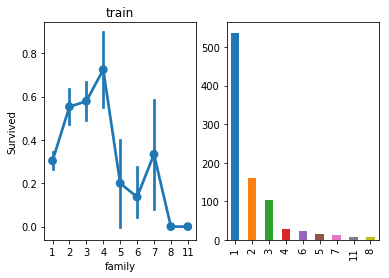

In [64]:
# Family numbers
def create_family(df):
    df['family'] = df['SibSp'] + df['Parch'] + 1

create_family(train)
create_family(test)

ax = plt.subplot(1,2,1)
sns.pointplot(x='family',y='Survived',data=train)
plt.title('train')
plt.subplot(1,2,2)
train['family'].value_counts().plot.bar()
train.info(),test.info()

(1    537
 3    193
 2    161
 Name: family_bin, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x14a53c2aa90>)

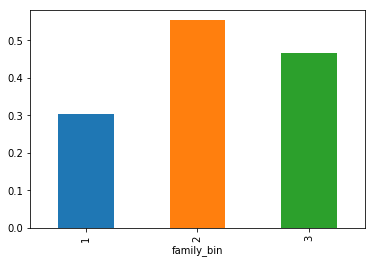

In [65]:
def create_family_bin(row):
    if row['family']>=3:
        return 3
    else: return row['family']
    
train['family_bin'] = train.apply(create_family_bin, axis=1)
test['family_bin'] = test.apply(create_family_bin, axis=1)
train['family_bin'].value_counts(), train.groupby(['family_bin'])['Survived'].mean().plot.bar()

In [66]:
# isalone or not
def create_isalone(df):
    df['isalone'] = df.apply(lambda x: 1 if x['family'] == 1 else 0, axis=1)

In [67]:
create_isalone(train)
create_isalone(test)
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 35 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

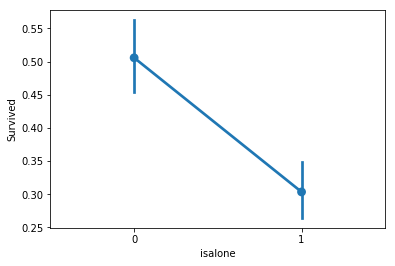

In [68]:
sns.pointplot(x='isalone',y='Survived',data=train)

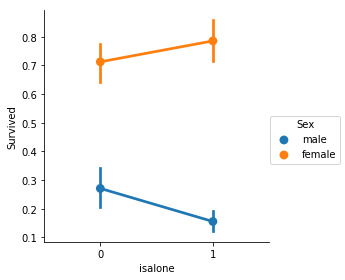

In [69]:
sns.factorplot(x='isalone',y='Survived',hue='Sex',data=train)

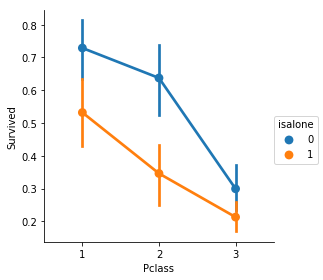

In [70]:
sns.factorplot(x='Pclass',y='Survived',data=train,hue='isalone')

In [71]:
def create_pclass_isalone(df):
    df['Pclass_isalone'] = df.apply(lambda x: x['Pclass']*10+x['isalone'],axis=1)

create_pclass_isalone(train)

create_pclass_isalone(test)
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 36 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

(None, None)

# Check whether columns are same between train and test (except for Survived)

In [72]:
v1 = list(train.columns.values)
v2 = list(test.columns.values) 
print(v1)
print(v2)

['Age', 'Cabin', 'Embarked', 'Fare', 'Fare_log', 'Name', 'Parch', 'Parch_bin', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'SibSp_bin', 'Survived', 'Ticket', 'Fare_4bins', 'Fare_5bins', 'Fare_10bins', 'Fare_bin_tao', 'Ticket_prefix_grp', 'connected_survived', 'title', 'title_cat', 'Cabin_isnull', 'Age_fillna', 'age_4bins', 'age_5bins', 'age_6bins', 'age_bin', 'age_le16', 'age_bin_tao', 'Embarked_fillna', 'family', 'family_bin', 'isalone', 'Pclass_isalone']
['Age', 'Cabin', 'Embarked', 'Fare', 'Fare_log', 'Name', 'Parch', 'Parch_bin', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'SibSp_bin', 'Survived', 'Ticket', 'Fare_4bins', 'Fare_5bins', 'Fare_10bins', 'Fare_bin_tao', 'Ticket_prefix_grp', 'connected_survived', 'title', 'title_cat', 'Cabin_isnull', 'Age_fillna', 'age_4bins', 'age_5bins', 'age_6bins', 'age_bin', 'age_le16', 'age_bin_tao', 'Embarked_fillna', 'family', 'family_bin', 'isalone', 'Pclass_isalone']


In [73]:
v1.sort()
v2.sort()
print(v1)
print(v2)

['Age', 'Age_fillna', 'Cabin', 'Cabin_isnull', 'Embarked', 'Embarked_fillna', 'Fare', 'Fare_10bins', 'Fare_4bins', 'Fare_5bins', 'Fare_bin_tao', 'Fare_log', 'Name', 'Parch', 'Parch_bin', 'PassengerId', 'Pclass', 'Pclass_isalone', 'Sex', 'SibSp', 'SibSp_bin', 'Survived', 'Ticket', 'Ticket_prefix_grp', 'age_4bins', 'age_5bins', 'age_6bins', 'age_bin', 'age_bin_tao', 'age_le16', 'connected_survived', 'family', 'family_bin', 'isalone', 'title', 'title_cat']
['Age', 'Age_fillna', 'Cabin', 'Cabin_isnull', 'Embarked', 'Embarked_fillna', 'Fare', 'Fare_10bins', 'Fare_4bins', 'Fare_5bins', 'Fare_bin_tao', 'Fare_log', 'Name', 'Parch', 'Parch_bin', 'PassengerId', 'Pclass', 'Pclass_isalone', 'Sex', 'SibSp', 'SibSp_bin', 'Survived', 'Ticket', 'Ticket_prefix_grp', 'age_4bins', 'age_5bins', 'age_6bins', 'age_bin', 'age_bin_tao', 'age_le16', 'connected_survived', 'family', 'family_bin', 'isalone', 'title', 'title_cat']


In [74]:
# Xlist = ['age_4bins','Cabin_fillna',
#          'Embarked_fillna','Fare_4bins','Parch','Pclass','Sex','SibSp','Ticket_prefix_grp',
#         'connected_survived','title_cat','isalone','Pclass_isalone']

In [75]:

# Xlist = ['Pclass_isalone', 'isalone','Cabin_fillna','Age_fillna','age_bin','Embarked_fillna','Fare','Parch','Pclass','Sex','SibSp','family','title_cat']

# print(Xlist)
# print(len(Xlist))
# print(train[Xlist].info())

# Convert Object into Integers

In [76]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [77]:
train['Embarked_fillna'].value_counts()

S    646
C    168
Q     77
Name: Embarked_fillna, dtype: int64

In [78]:
train['Ticket_prefix_grp'].value_counts()

3        301
Other    201
2        183
1        146
PC        60
Name: Ticket_prefix_grp, dtype: int64

In [79]:
train['title_cat'].value_counts()

Mr       517
Miss     182
Mrs      125
Other     67
Name: title_cat, dtype: int64

In [80]:
# train_copy = train.copy()
# train['Sex'] = train['Sex'].map({'male':0,'female':1})
# train['Embarked_fillna'] = train['Embarked_fillna'].map({'S':0,'C':1,'Q': 2})
# train['Ticket_prefix_grp'] = train['Ticket_prefix_grp'].map({'Other':0,'1':1,'2':2,'3':3,'PC':4})
# train['title_cat'] = train['title_cat'].map({'Mr':0,'Miss':1,'Mrs':2,'Other':3})




In [81]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 36 columns):
Age                   714 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
Fare                  891 non-null float64
Fare_log              891 non-null float64
Name                  891 non-null object
Parch                 891 non-null int64
Parch_bin             891 non-null object
PassengerId           891 non-null int64
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
SibSp_bin             891 non-null object
Survived              891 non-null float64
Ticket                891 non-null object
Fare_4bins            891 non-null float64
Fare_5bins            891 non-null float64
Fare_10bins           891 non-null float64
Fare_bin_tao          891 non-null object
Ticket_prefix_grp     891 non-null object
connected_survived    891 non-null float64
title    

# Feature Selection -- Very Important!

In [101]:
features = ['Pclass','Sex','SibSp_bin','Parch_bin','age_bin_tao','Fare_bin_tao', 
            'connected_survived','title_cat','Cabin_isnull','family_bin']
# create dummy variables
train_dummy = pd.get_dummies(train[features])
train_y = train['Survived']

test_dummy = pd.get_dummies(test[features])

def rename_age_bin(df):
    if 'age_bin_(0, 16]' in df.columns:
        mapper={'age_bin_(0, 16]': 'Age_bin_0_16',
                'age_bin_(16, 25]': 'Age_bin_16_25',
                'age_bin_(25, 30]': 'Age_bin_25_30',
                'age_bin_(30, 45]': 'Age_bin_30_45',
                'age_bin_(45, 80]': 'Age_bin_45_80'}
        df.rename(mapper,axis='columns',inplace=True)
        
    else:
        print("Age_bins don't exist in the dataframe\n")
    
    print("Columns are :\n")
    print(df.columns)

rename_age_bin(train_dummy)
rename_age_bin(test_dummy)


Age_bins don't exist in the dataframe

Columns are :

Index(['Pclass', 'connected_survived', 'Cabin_isnull', 'family_bin',
       'Sex_female', 'Sex_male', 'SibSp_bin_0', 'SibSp_bin_1+', 'Parch_bin_0',
       'Parch_bin_1', 'Parch_bin_2', 'age_bin_tao_10', 'age_bin_tao_20',
       'age_bin_tao_25', 'age_bin_tao_30', 'age_bin_tao_40', 'age_bin_tao_50',
       'age_bin_tao_50+', 'age_bin_tao_nan', 'Fare_bin_tao_10',
       'Fare_bin_tao_20', 'Fare_bin_tao_30', 'Fare_bin_tao_30+',
       'title_cat_Miss', 'title_cat_Mr', 'title_cat_Mrs', 'title_cat_Other'],
      dtype='object')
Age_bins don't exist in the dataframe

Columns are :

Index(['Pclass', 'connected_survived', 'Cabin_isnull', 'family_bin',
       'Sex_female', 'Sex_male', 'SibSp_bin_0', 'SibSp_bin_1+', 'Parch_bin_0',
       'Parch_bin_1', 'Parch_bin_2', 'age_bin_tao_10', 'age_bin_tao_20',
       'age_bin_tao_25', 'age_bin_tao_30', 'age_bin_tao_40', 'age_bin_tao_50',
       'age_bin_tao_50+', 'age_bin_tao_nan', 'Fare_bin_tao_10',

In [103]:
train_dummy.isnull().sum().sum()
train_dummy.shape,train_y.shape

((891, 27), (891,))

# Models
# Split data into train and test, apply several models to the train data and compare the accuracy_score on the test data across all the models

In [104]:
# This is working. Rewirte

y = np.ravel(train_y)
X_train, X_test, y_train, y_test = train_test_split(train_dummy,train_y, 
                                                    test_size=0.1, random_state=0)
logreg = LogisticRegression()
# Use RFECV to pick best features, using Stratified Kfold
rfecv = RFECV(estimator=logreg, cv=StratifiedKFold(y, 5), scoring='roc_auc')
# Fit the features to the response variable
rfecv.fit(train_dummy, train_y)

X_red = rfecv.transform(train_dummy)
# Put the best features into new df X_new
X_red_train = rfecv.transform(X_train)
X_red_test = rfecv.transform(X_test)

r_train = model_selection.cross_val_score(logreg, X_red, y, cv=StratifiedKFold(y, 5), scoring='roc_auc')
print(r_train)
print(np.mean(r_train))


[0.88550725 0.85625823 0.8894385  0.86564171 0.9051538 ]
0.8803998998881564


In [105]:
clf = LogisticRegression()
clf.fit(train_dummy,train_y)
print(clf.coef_)
print(clf.intercept_)


[[-0.49343862  2.56951084 -0.68944748  0.08846008  0.9953601  -1.01425199
   0.34327848 -0.36217037  0.54035629 -0.00810557 -0.55114261  1.22225343
   0.32910856 -0.13544997  0.13536556  0.10484038 -0.68062762 -0.96561317
  -0.02876907 -0.27897609 -0.15061968  0.17957889  0.23112498 -0.22659001
  -1.08681548  0.86209894  0.43241465]]
[-0.01889189]


# NOTE: roc_auc_score(y_test,y_pred_prob) Provide probability into this function !!!

In [106]:
models = [
            LogisticRegression(),
            DecisionTreeClassifier(max_depth=10),
            RandomForestClassifier(n_estimators=100),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=100),
            GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1),
            xgb.XGBClassifier(n_estimators=500)
            ]


y = np.ravel(train_y)
X_train, X_test, y_train, y_test = train_test_split(train_dummy,train_y, 
                                                        test_size=0.2, random_state=0)

cv_score_list = []
test_score_list = []
good_feature_list = []
for model in models:
    print(str(model).split('(')[0],"\n")
    rfecv = RFECV(estimator=model, cv=StratifiedKFold(y, 5), scoring='roc_auc')
    rfecv.fit(train_dummy, train_y)
    
    features= np.array(train_dummy.columns)
    index = list(rfecv.support_==True)
    good_feature_list.append(features[index])
#     print("support:\n", rfecv.support_)
    print("------- n_features is: ", rfecv.n_features_)
#     print("shape of training data and support_: \n", train_dummy.shape, len(rfecv.support_))
#     print("all features are: \n", features)
    print("------- good features are: \n", features[index])
    
    # Use rfecv.transform to create X_reduced
#     X_reduced = rfecv.transform(train_dummy)
#     X_reduced_train = rfecv.transform(X_train)
#     X_reduced_test = rfecv.transform(X_test)
    
    X_reduced = train_dummy[features[index]]
    
    cv_score = model_selection.cross_val_score(model, X_reduced, y, cv=StratifiedKFold(y, 5), scoring='roc_auc')
    cv_score_list.append(cv_score)
    print("------- mean cv score is: ", np.mean(cv_score))
    print("*-"*20)

LogisticRegression 

------- n_features is:  22
------- good features are: 
 ['Pclass' 'connected_survived' 'Cabin_isnull' 'Sex_female' 'Sex_male'
 'SibSp_bin_0' 'SibSp_bin_1+' 'Parch_bin_0' 'Parch_bin_2' 'age_bin_tao_10'
 'age_bin_tao_20' 'age_bin_tao_30' 'age_bin_tao_40' 'age_bin_tao_50'
 'age_bin_tao_50+' 'Fare_bin_tao_10' 'Fare_bin_tao_30' 'Fare_bin_tao_30+'
 'title_cat_Miss' 'title_cat_Mr' 'title_cat_Mrs' 'title_cat_Other']
------- mean cv score is:  0.8803998998881564
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
DecisionTreeClassifier 

------- n_features is:  6
------- good features are: 
 ['Pclass' 'connected_survived' 'Cabin_isnull' 'age_bin_tao_40'
 'Fare_bin_tao_10' 'title_cat_Mr']
------- mean cv score is:  0.8674657092049569
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
RandomForestClassifier 

------- n_features is:  14
------- good features are: 
 ['Pclass' 'connected_survived' 'Cabin_isnull' 'family_bin' 'Sex_female'
 'Sex_male' 'Parch_bin_0' 'age_bin_tao_25' 'age_bin_tao_30'
 '

In [109]:
print(good_feature_list[-2])

['Pclass' 'connected_survived' 'family_bin' 'Sex_female' 'Sex_male'
 'Fare_bin_tao_30+' 'title_cat_Mr']


# Models
# Try the learning curve plots
#### LogisticRegression http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#### DecisionTreeClassifier http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [92]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='roc_auc' )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

    plt.legend(loc="best")
#     print(train_sizes)
#     print("*-"*20)
    print("test_scores_mean is: ", test_scores_mean[-1])
    return plt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
test_scores_mean is:  0.8811844416990091
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_scores_mean is:  0.8559248785181286
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, 

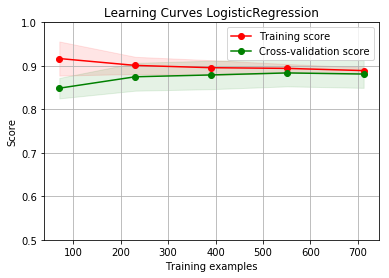

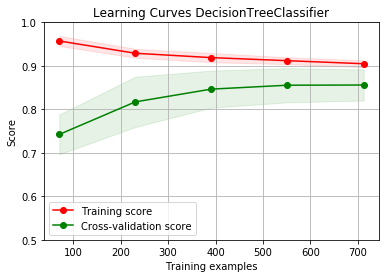

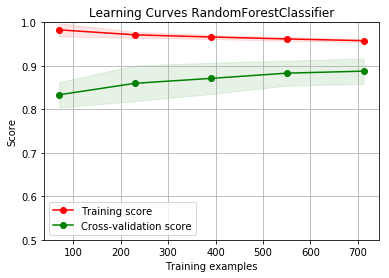

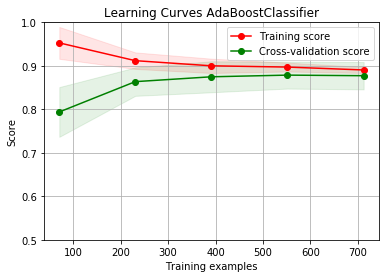

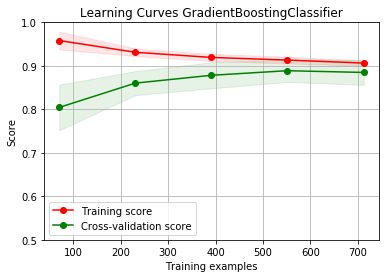

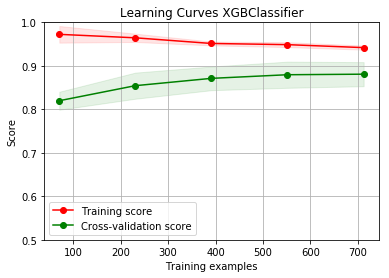

In [108]:
 for i, m in enumerate(models):
    title = "Learning Curves " + str(m).split('(')[0]
    print(str(m))
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = m
    plot_learning_curve(estimator, title, train_dummy[good_feature_list[i]], train_y, ylim=(0.5,1), cv=cv, n_jobs=4)

# Gradient Boosting has good scores in RFECV and Learning Curve analyses. Now let's predict the test scores.

In [133]:
# Gradient Boosting is the 3rd model in models
print(good_feature_list[-2])
model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1)
X = train_dummy[good_feature_list[-2]]
y = train_y
X_test = test_dummy[good_feature_list[-2]]
print(train_dummy.shape, test_dummy.shape)
print(X.shape,y.shape, X_test.shape)


model.fit(X,y)


['Pclass' 'connected_survived' 'family_bin' 'Sex_female' 'Sex_male'
 'Fare_bin_tao_30+' 'title_cat_Mr']
(891, 27) (418, 27)
(891, 7) (891,) (418, 7)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1, verbose=0,
              warm_start=False)

X columns are: 
 Index(['Pclass', 'connected_survived', 'family_bin', 'Sex_female', 'Sex_male',
       'Fare_bin_tao_30+', 'title_cat_Mr'],
      dtype='object')
model feature importance is: 
 [0.24705651 0.13883055 0.14350708 0.07989944 0.06116192 0.17923083
 0.15031367]
index sorted by the importance descendingly 
 [0 5 6 2 1 3 4]
feature names 
 ['Pclass' 'Fare_bin_tao_30+' 'title_cat_Mr' 'family_bin'
 'connected_survived' 'Sex_female' 'Sex_male']
feature importance: 
 [0.2470565128424967, 0.17923083351175026, 0.15031366921788714, 0.14350708178451851, 0.13883054714838794, 0.07989943750858311, 0.061161917986376386]


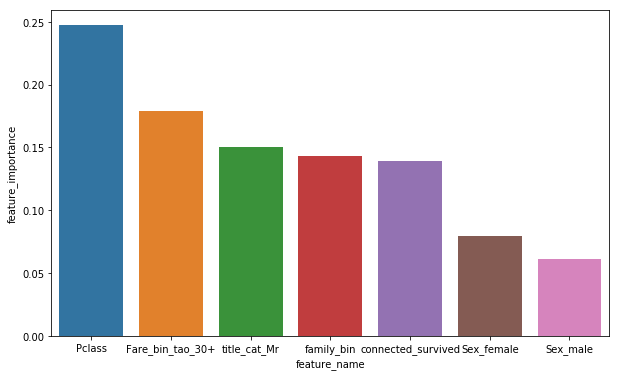

In [131]:
print("X columns are: \n",X.columns)
print('model feature importance is: \n',model.feature_importances_)
imp_index = np.argsort(model.feature_importances_)[::-1]
print('index sorted by the importance descendingly \n',imp_index)
x = np.array(X.columns)[imp_index]
print('feature names \n',x)
imp_value = sorted(model.feature_importances_.tolist(), reverse = True)
print('feature importance: \n',imp_value)
imp_df = pd.DataFrame({'feature_name':x,'feature_importance':imp_value})

plt.figure(figsize=(10,6))
sns.barplot(x='feature_name',y='feature_importance',data=imp_df)

In [136]:
test.head()

,Age,Cabin,Embarked,Fare,Fare_log,Name,Parch,Parch_bin,PassengerId,Pclass,...,age_5bins,age_6bins,age_bin,age_le16,age_bin_tao,Embarked_fillna,family,family_bin,isalone,Pclass_isalone
0,34.5,NaN,Q,7.8292,2.057860,"Kelly, Mr. James",0,0,892,3,...,3,4,"(30, 45]",0,40,Q,1,1,1,31
1,47.0,NaN,S,7.0000,1.945910,"Wilkes, Mrs. James (Ellen Needs)",0,0,893,3,...,4,5,"(45, 80]",0,50,S,2,2,0,30
2,62.0,NaN,Q,9.6875,2.270836,"Myles, Mr. Thomas Francis",0,0,894,2,...,4,5,"(45, 80]",0,50+,Q,1,1,1,21
3,27.0,NaN,S,8.6625,2.159003,"Wirz, Mr. Albert",0,0,895,3,...,2,2,"(25, 30]",0,30,S,1,1,1,31
4,22.0,NaN,S,12.2875,2.508582,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,896,3,...,1,1,"(16, 25]",0,25,S,3,3,0,30


In [139]:
y_hat = model.predict(X_test)
output = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_hat})
# output.to_csv("titanic_submission_Oct172018.csv",index=False)

# Also tried Random Forest and submitted

In [140]:
# Random Forecst is the 2rd model in models
print(good_feature_list[2])
model = RandomForestClassifier(n_estimators=250)
model.fit(X,y)
y_hat2 = model.predict(X_test)
output = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_hat2})
# output.to_csv("titanic_submission_Oct172018_RandomForecst.csv",index=False)

['Pclass' 'connected_survived' 'Cabin_isnull' 'family_bin' 'Sex_female'
 'Sex_male' 'Parch_bin_0' 'age_bin_tao_25' 'age_bin_tao_30'
 'age_bin_tao_40' 'Fare_bin_tao_10' 'Fare_bin_tao_30+' 'title_cat_Miss'
 'title_cat_Mr']


# Conclusions: 
# Binning the variables are very important. We didn't use WOE but by checking the Survived% across bins will give us a good idea.
# Feature selection is very important. I created many dummy variables, RFECV helped a lot to reduce the # of features/bins
# When we need to use roc_auc_score() function, make sure provide the probability not the labels.

In [ ]:
# def model_train_predict(model, X, y, metrics=metrics.roc_auc_score):
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
#     model.fit(X_train,y_train)
#     y_hat = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)
#     return metrics(y_test,y_prob)

# Now let's try xgboost
# https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
# from hyperopt import fmin, hp, tpe

In [ ]:
# print(train_dummy_X.columns)

### fmin function doesn't allow '(' or '[]' in column names. We need to rename it

In [ ]:
# train_X_xgb = train_dummy_X.copy()
# test_X_xgb = test_dummy_X.copy()   

# def rename_age_bin(df):
#     if 'Age_bin_(0, 20]' in df.columns:
#         mapper={'Age_bin_(0, 20]': 'Age_bin_0_20',
#                 'Age_bin_(20, 26]': 'Age_bin_20_26',
#                 'Age_bin_(26, 30]': 'Age_bin_26_30',
#                 'Age_bin_(30, 38]': 'Age_bin_30_38',
#                 'Age_bin_(38, 80]': 'Age_bin_38_80'}
#         train_X_xgb.rename(mapper,axis='columns',inplace=True)
        
#     else:
#         print("Age_bins don't exist in the dataframe\n")
    
#     print("Columns are :\n")
#     print(df.columns)
        
# rename_age_bin(train_X_xgb)
# rename_age_bin(test_X_xgb)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(train_X_xgb,train_y,test_size=0.3,random_state=0)

In [ ]:
# X_train.columns

### NEED MORE WORK ON fmin()

In [ ]:
# def lossfunc(params):
#     model = xgb.XGBClassifier(**params)
#     model.fit(X_train,y_train)
#     y_hat = model.predict(X_test)
#     score = metrics.accuracy_score(y_test,y_hat)
#     return (1-score)
# space = {
#     'eta':hp.uniform('eta',0.3,0.5),   #[default=0.3, alias: learning_rate]
#     'max_depth':  hp.choice('max_depth', range(4,6)),
#     'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
#     'subsample': hp.quniform('subsample', 0.5, 1, 0.05)
# }
# best = fmin(lossfunc, space, algo=tpe.suggest, max_evals=100)
# print(best)

In [ ]:
# xgbmodel = xgb.XGBClassifier(**best)

# %time score = model_train_predict(xgbmodel,train_X_xgb, train_y)
# print(score)


### NEED MORE WORK ON fmin()

### The above tuning is based on a Kaggle kernel, but the result is not good. 

### Method 1 from internet 
### https://stats.stackexchange.com/questions/183984/how-to-use-xgboost-cv-with-hyperparameters-optimization

In [ ]:
# len(train_X_xgb)

In [ ]:
# from scipy import stats
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn import cross_validation

# clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
# param_dist = {'n_estimators': stats.randint(900, 1200),
#               'learning_rate': stats.uniform(0.01, 0.07),
#               'subsample': stats.uniform(0.3, 0.7),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': stats.uniform(0.25, 0.45),
#               'min_child_weight': [1, 2, 3]
#              }
# clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'accuracy', error_score = 0, verbose = 3, n_jobs = 4)

# numFolds = 5
# folds = cross_validation.KFold(n = len(train_X_xgb), shuffle = True, n_folds = numFolds)

# estimators = []
# results = np.zeros(len(X))
# score = 0.0
# for train_index, test_index in folds:
#     X_train, X_test = train_X_xgb.iloc[train_index], train_X_xgb.iloc[test_index]
#     y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
#     clf.fit(X_train, y_train)

#     estimators.append(clf.best_estimator_)
#     results[test_index] = clf.predict(X_test)
#     score += metrics.f1_score(y_test, results[test_index])
# score /= numFolds

In [ ]:
# print(len(train_index))
# print(len(test_index))
# print(score)

In [ ]:
# print(estimators)

 # Method 2 from internet. 

# Try tune xgboost based on online article https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [ ]:
# function from the link above
def modelfit(alg, X, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=100, metrics_eval='error'):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=y.values)
        
        # alg is sklearn.XGBClassifier, one parameter is n_estimators, which should be set as teh num_boost_round
        # in xgb.cv(). 
        #check the post here https://stackoverflow.com/questions/46943674/how-to-get-predictions-with-xgboost-and-xgboost-using-scikit-learn-wrapper-to-ma
        
        n_estimators = alg.get_params()['n_estimators']
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=n_estimators, nfold=cv_folds,
            metrics=metrics_eval, early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        newcolumns = []
        if metrics_eval == 'error':
            # modify column name -error- to -accuracy-
            for c in cvresult.columns:
                newcolumns.append(c.replace('error','accuracy'))
        cvresult = 1 - cvresult
        cvresult.columns = newcolumns
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
       
    #Print the final train and test results:
    print("\n Final cvresult after all the boosting iterations:\n")
    print(cvresult.iloc[-1,:])
                    
    # modified by Tao
    imp = alg.feature_importances_
    indices = np.argsort(imp)[::-1]
    ax = pd.Series(imp).sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.xlabel("features")
    ax.set_xticklabels(X.columns[indices])
    
      #from author, but I don't think it provides what we need 
#         Print model report:
#     print("\nModel Report")
#     print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
#     print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    return cvresult


In [ ]:
target = 'Survived'

In [ ]:
# # walk through the function modelfit
# # num_boost_round determines how many boosting iterations we will have to correct the errors.
# # It's possible that early_stopping_rounds takes effect before reaching num_boost_round.


# alg = XGBClassifier()  # this is sklearn XGBClassifer wrapper. 
# xgtrain = xgb.DMatrix(train_X_xgb.values, label=train_y.values)
# xgb_param = alg.get_xgb_params()

# print('params are: \n')
# print(xgb_param)

# cv_folds = 5
# early_stopping_rounds = 50
# metrics_eval = 'error'
# cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=50, nfold=cv_folds,
#             metrics=metrics_eval, early_stopping_rounds=early_stopping_rounds)

# newcolumns = []
# if metrics_eval == 'error':
#     # modify column name -error- to -accuracy-
#     for c in cvresult.columns:
#         newcolumns.append(c.replace('error','accuracy'))
# cvresult = 1 - cvresult
# cvresult.columns = newcolumns


# X = train_X_xgb.values
# y=train_y.values
# alg.fit(X,y)
# print("feature importances: \n",alg.feature_importances_)
# print(cvresult.iloc[-1,:])
# print(cvresult.iloc[-10:,:])

In [ ]:
# cvresult.head()

In [ ]:
# alg.get_params

### test score with max_depth=5, min_child_weight=1 is 0.831637. This is the starting model

In [ ]:
# xgb1 = XGBClassifier(
# learning_rate =0.1,
# n_estimators=2000,
# max_depth=5,
# min_child_weight=1,
# gamma=0,
# subsample=0.8,
# colsample_bytree=0.8,
# objective= 'binary:logistic',
# nthread=4,
# scale_pos_weight=1,
# seed=27)
# cvresult1 = modelfit(xgb1, train_dummy_X[xlist2], train_y, metrics_eval = 'error')
# print(cvresult1.iloc[-5:,:])

### Step 2: Tune max_depth and min_child_weight

In [ ]:
# Below is the code from https://stackoverflow.com/questions/42993550/gridsearchcv-xgboost-early-stopping
# showing how to set early_stopping_rounds in GridSearchCV
#****************************************************************

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import TimeSeriesSplit

# cv = 2

# trainX= [[1], [2], [3], [4], [5]]
# trainY = [1, 2, 3, 4, 5]

# # these are the evaluation sets
# testX = trainX 
# testY = trainY

# paramGrid = {"subsample" : [0.5, 0.8]}

# fit_params={"early_stopping_rounds":42, 
#             "eval_metric" : "mae", 
#             "eval_set" : [[testX, testY]]}

# model = xgb.XGBRegressor()
# gridsearch = GridSearchCV(model, paramGrid, verbose=1 ,
#          fit_params=fit_params,
#          cv=TimeSeriesSplit(n_splits=cv).get_n_splits([trainX,trainY]))
# gridsearch.fit(trainX,trainY)

In [ ]:

# param_test1 = {
#  'max_depth':range(3,7,2),
#  'min_child_weight':range(1,5,2)
# }

# fit_params={"early_stopping_rounds":50,
#             "eval_metric" : "error",
#             "eval_set": [(train_X_xgb,train_y)]
#            }


# gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
#                                                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#                                                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
# param_grid = param_test1, scoring='accuracy',n_jobs=4, iid=False, cv=5,fit_params = fit_params)

# gsearch1.fit(train_X_xgb, train_y)

# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



### test score with max_depth=5, min_child_weight=3 is 0.830532

In [ ]:
# cvresult = modelfit(XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
# min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#          train_X_xgb, 
#          train_y,
#          'error')


In [ ]:
# cvresult['test-accuracy-mean'].plot()

### Above, we used step =2 for searching. Now we do a finer search

In [ ]:
# param_test1 = {
#  'max_depth':range(1,5,1),
#  'min_child_weight':range(1,6,1)
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
# min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
# param_grid = param_test1, scoring='accuracy',n_jobs=4, iid=False, cv=5, fit_params=fit_params)

# gsearch1.fit(train_X_xgb,train_y)

# print("The results are: \n")
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

### test score with max_depth=4, min_child_weight=5 is 0.833890

In [ ]:
# cvresult = modelfit(XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
# min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#          train_X_xgb, 
#          train_y,
#          'error')

### Test score is slightly better with max_depth=2 and min_child_weight=5

### Step 3: Tune gamma

In [ ]:
# param_test3 = {
#  'gamma':[i/10.0 for i in range(0,10)]
# }
# gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
#  min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

# gsearch3.fit(train_X_xgb,train_y)

# print("The results are: \n")
# gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

### test score with max_depth=5, min_child_weight=3, gamma =0.7 is 0.835014

In [ ]:
# cvresult = modelfit(XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
# min_child_weight=5, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#          train_X_xgb, 
#          train_y,
#          'error')

### Testing score is slightly better. gamma = 0.5

### Step 4: Tune subsample and colsample_bytree

In [ ]:
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
#  min_child_weight=5, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(train_X_xgb,train_y)
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

### test score with max_depth=5, min_child_weight=3, gamma =0.7, colsample_bytree=0.9, subsample=0.9 is 0.8372

In [ ]:
# cvresult = modelfit(XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
# min_child_weight=5, gamma=0.7, subsample=0.9, colsample_bytree=0.9,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#          train_X_xgb, 
#          train_y,
#          'error')

### A finer search on subsample and colsample_bytree

In [ ]:
# param_test5 = {
#  'subsample':[i/100.0 for i in range(85,105,5)],
#  'colsample_bytree':[i/100.00 for i in range(85,105,5)]
# }
# gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
#  min_child_weight=5, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# gsearch5.fit(train_X_xgb,train_y)
# gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

### test score is worse than colsample_bytree=0.9, subsample=0.9

In [ ]:
# cvresult = modelfit(XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
# min_child_weight=5, gamma=0.7, subsample=0.9, colsample_bytree=1.0,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#          train_X_xgb, 
#          train_y,
#          'error')

### Step 5: Tuning Regularization Parameters

In [ ]:
# param_test6 = {
#  'reg_alpha':[0, 1e-5, 1e-2, 0.1, 1, 100]
# }
# gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
#  min_child_weight=5, gamma=0.7, subsample=0.9, colsample_bytree=0.9,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# gsearch6.fit(train_X_xgb,train_y)
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

### It's getting worse. So we don't want to change reg_alpha

In [ ]:
# param_test6 = {
#  'reg_alpha':[0.01,0.05,1,1.05,1.1]
# }
# gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=2,
#  min_child_weight=5, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# gsearch6.fit(train_X_xgb,train_y)
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

### Step 6: Reducing Learning Rate. Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

### Before changing learning_rate, xgb4 is the best result. 

In [ ]:
# # keep the default learning_rate
# xgb4 = xgb.XGBClassifier(
#                             learning_rate =0.1,
#                             n_estimators=1000,
#                             max_depth=4,
#                             min_child_weight=5,
#                             gamma=0.7,
#                             subsample=0.9,
#                             colsample_bytree=0.9,
#                             reg_alpha=0,
#                             objective= 'binary:logistic',
#                             nthread=4,
#                             scale_pos_weight=1,
#                             seed=27)
# cvresult = modelfit(xgb4, train_X_xgb, train_y,'error')

### Let's reduce learing_rate to 0.08, test score is 0.831643, which is worse than before.

In [ ]:
# xgb5 = xgb.XGBClassifier(
#                             learning_rate =0.08,
#                             n_estimators=1000,
#                             max_depth=4,
#                             min_child_weight=5,
#                             gamma=0.7,
#                             subsample=0.9,
#                             colsample_bytree=0.9,
#                             reg_alpha=0,
#                             objective= 'binary:logistic',
#                             nthread=4,
#                             scale_pos_weight=1,
#                             seed=27)
# cvresult = modelfit(xgb5, train_X_xgb, train_y,'error')

# Compare all models on one test dataset

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(train_X_xgb,train_y,test_size=0.2,random_state=100)

# models = [
#             LogisticRegression(solver='liblinear'),
#             DecisionTreeClassifier(max_depth=10),
#             RandomForestClassifier(n_estimators=100),
#             AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
#                          algorithm="SAMME",
#                          n_estimators=200),
#             GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,subsample=1),
#             xgb4
#             ]

# name=[] 
# accuracy = []
# roc = []
# for m in models:
#     name.append(str(m).split('(')[0]) 
#     m.fit(X_train,y_train)
#     y_hat = m.predict(X_test)
#     accuracy.append(metrics.accuracy_score(y_test,y_hat))
#     roc.append(metrics.roc_auc_score(y_test,y_hat))

# result = pd.DataFrame({'Accuracy': accuracy,'ROC':roc })
# result.index=name

In [ ]:
# result

In [ ]:
# bestmodel = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,subsample=1)

In [ ]:
# bestmodel.fit(train_dummy_X,train_y)

In [ ]:
# y_hat = bestmodel.predict(test_imp_X[features])
# output = pd.DataFrame({'PassengerId':test_imp_X['PassengerId'],'Survived':y_hat})
# output.to_csv("titanic_submission.csv",index=False)